# Monday

The most common supervised learning tasks are regression (predicting values) and classification (predicting classes). Last week we explored a regression task, predicting housing values, using various algorithms. Now we will turn our attention to classification
systems.

## 1. Business Understanding
In this week, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied
so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST. 


The task you are asked to perform is to build a model that classifies handwritten digits, given the handwritten images.  

For learning purposes, we will split the Modeling phase into two parts. In the first part, we will simplify the problem and train a model to predict one digit – for example the number 5. This “5-detector” is an example of a binary classifier, capable of distinguishing between two classes, 5 and not-5. In the second part, we will explore multiclass classifiers that predicts all classes.   

### 1.1 Frame the problem
Since each image is labeled with the digit it represents, the problem is a supervised learning problem. Furthermore, since you are asked to classify digits, the problem is a classification problem.  

In case of predicting the classes “5” and “not 5”, the problem is binary classification problem. In case of predicting all classes, the problem is a multiclass classification problem.  

Remark: In case of a binary classification problem, the main  goal is to train a model that identifies the digit 5. This class is referred to as the positive class, while the not-5 class is referred to as the negative class.  

### 1.2 Select a Performance Measure 

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will take a good amount of time introducing you to the four fundamental performance measures for classifiers.  

#### 1.2.1 Classification Accuracy 

Classification Accuracy, or accuracy for short, might be the most intuitive metric. It shows the ratio of correct predictions to all predictions: 
- Accuracy = number of correct predictions / number of all predictions

It works well ONLY if there are equal number of samples belonging to each class! Why this is the case, is best explained with an example.  

Let us consider the spam email example, that is, imagine you are designing a model to detect spam emails. An ordinary email address receives very few spam emails compared to the other emails. Thus, the dataset used for training is likely to be unbalanced. 

Let’s say the ratio of spam emails and regular ones in the dataset is 5 to 95. If a model predicts every email as not spam, it will have an accuracy of 95% which actually sounds good. However, it is a model that does nothing (always predicts not spam). 

Furthermore, mistakes on spam and other emails should be handled differently. It is not much of a problem to miss a spam email and let it go to the inbox. However, it could have severe consequences to mark an important email as spam. 

The classification accuracy does not provide us the flexibility that we need for differentiating mistakes on spam and other emails. Next we will introduce a more “flexible” metric to evaluate the performance of a classification model.  

#### 1.2.2 Confusion Matrix

Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model. In particular, it provides an overview of the model performance on different classes separately. 

Let us assume we have a binary classification problem. We have some samples belonging to two classes : YES or NO. Also, we have our own classifier which predicts a class for a given input sample. On testing our model on 165 samples, we get the following result. 

|           |Prediction: NO | Prediction Yes |
|:----------|:-------------:|---------------:|
|**Acutal: NO**| 50            | 10             |
|**Acutal: YES**| 5             | 100            |

In this example, NO is the positive class (first row and first column) while YES is the negative class. There are 4 important terms : 

- True Positives (TN): The cases in which we predicted YES and the actual output was also YES. 

- True Negatives (TP): The cases in which we predicted NO and the actual output was NO. 

- False Positives (FP): The cases in which we predicted YES and the actual output was NO. 

- False Negatives (FN): The cases in which we predicted NO and the actual output was YES. 

Both TP and TN are correct predictions so we expect them to be high compared to the FP and FN. 

In general, a confusion matrix for a binary classification problem has the following form:  

|            |Negative       | Positive |
|:-----------|:-------------:|---------------:|
|**Negative**| TN            | FP             |
|**Positive**| FN            | TP             |

Accuracy for the matrix can be calculated by taking average of the values lying across the “main diagonal” i.e., 
- Accuracy = (True Positive + True Negative) / total sample

[Machine Learning Fundamentals: The Confusion Matrix](https://www.youtube.com/watch?v=Kdsp6soqA7o)

#### 1.2.3 Precision and Recall  
The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric.  

An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier. Precision corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points. It is defined as: 
- Precision = TP / (TP + FP)

A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one positive instance. So precision is typically used along with another metric named recall, also called sensitivity or true positive rate (TPR). 

Recall is the ratio of positive instances that are correctly detected by the classifier and is defined as:
- Recall = TP / (TP + FN)

#### 1.2.4 F1 Score 

It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. 

F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances). 

High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify. The greater the F1 Score, the better is the performance of our model. 

The F1 score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall.  

For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a human pipeline to check the classifier’s video selection). On the other hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).  

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the precision/recall tradeoff. We will explore this tradeoff in more depth soon. 

[Precision, Recall, & F1 Score Intuitively Explained](https://www.youtube.com/watch?v=8d3JbbSj-I8)


## 2. Data Understanding

Data understanding typically involves the following steps: 

- Determine what data is needed and collect the data if not available 
- Explore data 
- Verify data quality 

Regarding the first step; Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset:

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mnist = mnist = fetch_openml('mnist_784', version=1)
type(mnist)

sklearn.utils.Bunch

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
- A DESCR key describing the dataset
- A data key containing an array with one row per instance and one column per feature
- A target key containing an array with the labels

Next we store the features as a pandas DataFrame and the target variable as a pandas Series.


In [4]:
X, y = mnist["data"], mnist["target"]

type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [5]:
X.shape, y.shape

((70000, 784), (70000,))

In [6]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

There are 70,000 images, and each image has 784 features. This is because each image is 28×28 = 784 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function:

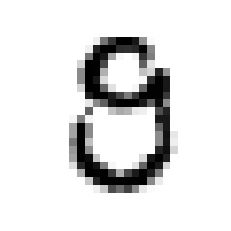

In [8]:
some_digit = X.iloc[80,:].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

This looks like a 5, and indeed that’s what the label tells us:

In [9]:
y[0]

'5'

Note that the label is a string. We prefer numbers, so let’s cast y to integers:

In [10]:
y = y.astype(np.uint8)

Let us check for missing values:

In [11]:
X.isnull().sum().sum() 

0

In [12]:
# or 
X.isnull().any().any()

False

There are no missing values.

## 3. Data Preparation

There are no categorical variables and no missing values. Since the range of each row, that is, of each image ranges between 0 and 255, there are also no outliers. Thus, the only thing left is to split the data into training and testing.

The MNIST dataset is actually already split into a training set (the first 60.000 images) and a test set (the last 10,000 images):

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

The training set is already shuffled for us, which is good as this guarantees that all cross-validation folds will be similar (you don’t want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the order of the training
instances, and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won’t happen.

Remark: Shuffling may be a bad idea in some contexts — for example, if you are working on time series data, that is, data is time dependent. 

# Tuesday

## 4. Modeling
## 4.1 Binary Classifier
Let’s simplify the problem for now and only try to identify one digit — for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for
this classification task:


In [14]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5) 

Okay, now let’s pick a classifier and train it. A good place to start is with a **Stochastic Gradient Descent (SGD)** classifier, using Scikit-Learn’s SGDClassifier class. This classifier has the advantage of being capable of handling very large datasets efficiently.
For further information regarding the SGD, please watch:

[Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI&t=4s)

Let’s create an SGDClassifier and train it on the whole training set: 

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Remark: The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you should set the random_state parameter.

Now you can use it to detect images of the number 5:

In [16]:
sgd_clf.predict([some_digit])

array([False])

The classifier guesses that this image represents a 5 (True). Looks like it guessed right in this particular case! Now, let’s evaluate this model’s performance.

As we learned yesterday, evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a large part of this week on this topic.

### 4.1.1 Measuring Accuracy Using Cross-Validation
A good way to evaluate a model is to use cross-validation, just as you did last week. Let’s use the cross_val_score() function to evaluate your SGDClassifier model using K-fold cross-validation, with three folds. Remember that K-fold crossvalidation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds:



In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Wow! Above 94% accuracy (ratio of correct predictions) on all cross-validation folds? This looks amazing, doesn’t it? Well, before you get too excited, let’s look at how many digits from the training set correspond to 5:

In [18]:
y_train_5/y_train.shape[0] * 100 # 9% of the digits are 5, that is, 91% of them are not 5!

0        0.001667
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
59995    0.000000
59996    0.000000
59997    0.001667
59998    0.000000
59999    0.000000
Name: class, Length: 60000, dtype: float64

9% of the digits are 5, that is, 91% of them are not 5! This means, that if a model always classfies a digit as non-5, it will be right 91% of time! 

This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

### 4.1.2 Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. 

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let’s keep it untouched for now (remember that you want to use the test set only at the
very end of your project, once you have a classifier that you are ready to launch). Instead, you can use the cross_val_predict() function:


In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each
instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).

Now you are ready to get the confusion matrix using the confusion_matrix() function. Just pass it the target classes (y_train_5) and the predicted classes (y_train_pred):

In [20]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_train_5, y_train_pred)
cf_matrix 

array([[53892,   687],
       [ 1891,  3530]])

The confusion matrix we got:

|53892    | 687     |  
|:-------:|:-------:|
|**1891** | **3530**|

Your confusion matrix might differ!

Each row in a confusion matrix represents an actual, while each column represents a predicted class. The first row of this matrix considers 5 images (the negative class): 53.892 of them were correctly classified as non-5s (true negatives), while the remaining 687 were wrongly classified as 5s (false positives). The second row considers the images of 5s (the positive class): 1.891 were wrongly classified as non-5s (false negatives), while the remaining 3.350 were correctly classified as 5s (true positives). A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):

In [21]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

### 4.1.3 Precision and Recall

Scikit-Learn provides several functions to compute classifier metrics, including precision and recall:

In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) 

0.8370879772350012

In [23]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Precision is 83,7% and recall is 65,1%. Thus, we have higher precision than recall. 

Remember, precision is the measure of how many 5s the model correctly predicted over the amount of correct and incorrect predictions. With a precision of 83,7%, we can state that the model is correct 83,7% of the time. 

Recall is the measure of how many 5s the model correctly predicted over the total amount of 5s in the dataset. With a recall of 65,1%, we can state that the model detects 65,1% of the true 5s.  

Now your 5-detector does not look as shiny as it did when you looked at its accuracy!

### 4.1.4 F1 Score
To compute the F1 score, simply call the f1_score() function:

In [24]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

The F1 score is 73,3%, which is somewhere in the middle of the precision and recall scores. 

The F1 score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall. For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a human pipeline to check the classifier’s video selection). On the other hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught). Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the **precision/recall tradeoff**.

### 4.1.5 Precision / Recall Tradeoff 

To understand this tradeoff, let’s look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class. The following figure* shows a few digits positioned from the lowest score on the left to the highest score on the right. Suppose the decision threshold is positioned at the central arrow (between the two 5s): you will find 4 true positives (actual 5s) on the right of that threshold, and one false positive (actually a 6). Therefore, with that threshold, the precision is 80% (4 out of 5). But out of 6 actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). Now if you raise the threshold (move it to the arrow on the right), the false positive (the 6) becomes a true negative, thereby increasing precision (up to 100% in this case), but one true positive becomes a false negative, decreasing recall down to 50%. Conversely, lowering the threshold increases recall and reduces precision.


![Precision_Recall_Tradeoff](Precision_Recall_Tradeoff.png)

Remark*: You can only few the figure if you have saved the Precision_Recall_Tradeoff.png at the same place as this notebook.

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a
score for each instance, and then make predictions based on those scores using any threshold you want:

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-4936.51166196])

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred 

array([False])

The SGDClassifier uses a threshold equal to 0, so the previous code returns the same result as the predict() method (i.e., True). Let’s raise the threshold:

In [27]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 8.000.

Now how do you decide which threshold to use? For this you will first need to get the scores of all instances in the training set using the cross_val_predict() function again, but this time specifying that you want it to return decision scores instead of predictions:


In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

Now with these scores you can compute precision and recall for all possible thresholds using the precision_recall_curve() function:

In [29]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Finally, you can plot precision and recall as functions of the threshold value using Matplotlib: 

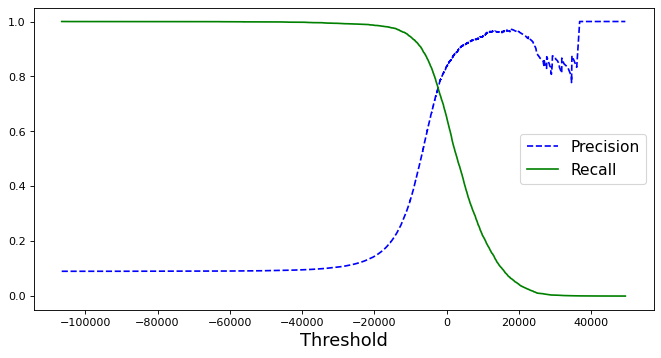

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 5), dpi=80) # setting figure size
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(fontsize=14) 
    plt.xlabel('Threshold', fontsize=16)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


Remark: You may wonder why the precision curve is bumpier than the recall curve in Figure 3-4. The reason is that precision may sometimes go down when you raise the threshold (although in general it will go up). To understand why, look back at the previous figure and notice what happens when you start from the central threshold and move it just one digit to the right: precision goes from 4/5 (80%) down to 3/4 (75%). On the other hand, recall can only go down when the threshold is increased, which explains why its curve looks smooth.


So let’s suppose you decide to aim for 90% precision. Looking the value up that gives you 90% precision from the last plot is difficult You can certainly see that it lies between 0 and 50.000. To be more precise you can search for the lowest threshold that gives you at least 90% precision (np.argmax() will give us the first index of the maximum value, which in this case means the first True value):

In [31]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.019499143958

To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can just run this code:

In [32]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

Let’s check these predictions’ precision and recall:

In [33]:
precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90)

(0.9000345901072293, 0.4799852425751706)

Great, you have a 90% precision classifier ! As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you’re done. Hmm, not so fast. A high-precision classifier is not very useful if its
recall is too low!

**If someone says “let’s reach 99% precision,” you should ask, “at what recall?**

# Wednesday

## 4.2 Multiclass Classifier

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers. However, there are various strategies that you can use to perform multiclass classification using multiple binary classifiers.

For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get
the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the one-versus-all (OvA) strategy (also called one-versus-the-rest). 

Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. If there are N classes, you need to
train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set, so for these algorithms OvO is preferred since it is faster to train many classifiers on small training sets than training few classifiers on large training sets. For most binary classification algorithms, however, OvA is preferred. 

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO). Let’s try this with the SGDClassifier:

In [34]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])

array([8], dtype=uint8)

That was easy! This code trains the SGDClassifier on the training set using the original target classes from 0 to 9 (y_train), instead of the 5-versus-all target classes (y_train_5). Then it makes a prediction (a correct one in this case). Under the hood,
Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score.

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance and pass a binary classifier to its constructor. For example, this code creates a multiclass classifier using the OvO strategy, based on a SGDClassifier:

In [35]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([8], dtype=uint8)

In [36]:
len(ovo_clf.estimators_)

45

Now of course you want to evaluate the classifier. As usual, you want to use crossvalidation. Let’s evaluate the SGDClassifier’s accuracy using the cross_val_score() function:

In [37]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

It gets over 85% on all test folds. If you used a random classifier, you would get 10% accuracy, so this is not such a bad score, but you can still do much better. For example, simply scaling the inputs (as discussed in week 10) increases accuracy above
89%:

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### 4.2.1 Confusion Matrix

Of course, if this were a real project, you would: explorw data preparation options, try out multiple models, shortlist the best ones and fine-tune their hyperparameters using GridSearchCV, and automating as much as possible, as you did in the previous week. Here, we will assume that you have found a promising model and you want to find ways to improve it. One way to do this is to analyze the types of errors it makes.

First, you can look at the confusion matrix. You need to make predictions using the cross_val_predict() function, then call the confusion_matrix() function, just like you did earlier:

In [39]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx 

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

That’s a lot of numbers. It’s often more convenient to look at an image representation of the confusion matrix, using Matplotlib’s matshow() function:

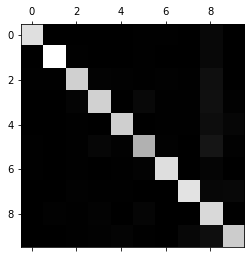

In [40]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks fairly good, since most images are on the main diagonal, which means that they were classified correctly. The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that
the classifier does not perform as well on 5s as on other digits. In fact, you can verify that both are the case.

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error rates instead of absolute number of errors (which would make abundant classes look
unfairly bad):

In [41]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:

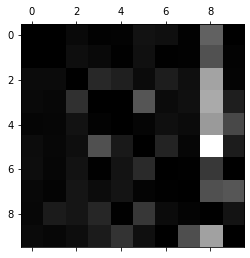

In [42]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Now you can clearly see the kinds of errors the classifier makes. Remember that rows represent actual classes, while columns represent predicted classes. The column for class 8 is quite bright, which tells you that many images get misclassified as 8s. However, the row for class 8 is not that bad, telling you that actual 8s in general get properly classified as 8s. As you can see, the confusion matrix is not necessarily symmetrical. You can also see that 3s and 5s often get confused (in both directions).

### 4.2.2 Precision & Recall

In multiclass classification problems, there are no positive or negative classes. But we can compute precision and recall for each class with the sklearn functions precision_score and recall_score:

In [43]:
precision_score(y_train, y_train_pred, average=None)

array([0.96856547, 0.97279222, 0.92586023, 0.91573231, 0.93605491,
       0.88104679, 0.9532967 , 0.94638695, 0.65998055, 0.89896145])

In [44]:
recall_score(y_train, y_train_pred, average=None)

array([0.94158366, 0.94927321, 0.87613293, 0.8525526 , 0.88702499,
       0.81977495, 0.93815478, 0.90726257, 0.92787558, 0.85846361])

### 4.2.3 Macro, Micro and weighted F1 

Macro averaging is perhaps the most straightforward amongst the numerous averaging methods. The macro-averaged F1 score (or macro F1 score) is computed by taking the mean of all the per-class F1 scores. This method treats all classes equally. 


Micro averaging computes a global average F1 score by counting the sums of the True Positives (TP), False Negatives (FN), and False Positives (FP). RNote, that the micro F1 score is actually the overall accuracy of the model. The reason is that micro-averaging essentially computes the proportion of correctly classified observations out of all observations. If we think about this, this definition is in fact what we use to calculate overall accuracy. 

The last one is weighted-average F1 score. Unlike Macro F1, it takes the mean of all per-class F1 scores while considering each class’s support. Support refers to the number of actual occurrences of the class in the dataset. For example, the support value of the class 5 is 
5.421 because there are 5.421 occurrences of that class in the dataset. The ‘weight’ essentially refers to the proportion of each class’s support relative to the sum of all support values. Thus, in case of the class 5, the weight is 5.421 / 60.000. 

Further readings: [Micro, Macro & Weighted Averages of F1 Score, Clearly Explained](https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f) 

To compute the above scores all in once, you can apply the classification_report function from sklearn.metrics:

In [45]:
from sklearn.metrics import classification_report

target_names = ['class 0','class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(y_train, y_train_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.94      0.95      5923
     class 1       0.97      0.95      0.96      6742
     class 2       0.93      0.88      0.90      5958
     class 3       0.92      0.85      0.88      6131
     class 4       0.94      0.89      0.91      5842
     class 5       0.88      0.82      0.85      5421
     class 6       0.95      0.94      0.95      5918
     class 7       0.95      0.91      0.93      6265
     class 8       0.66      0.93      0.77      5851
     class 9       0.90      0.86      0.88      5949

    accuracy                           0.90     60000
   macro avg       0.91      0.90      0.90     60000
weighted avg       0.91      0.90      0.90     60000



Which average should you choose? 

In general, if you are working with an imbalanced dataset where all classes are equally important, using the macro average would be a good choice as it treats all classes equally. 

It means that for our example involving the classification of the digits 0-9, we would use the macro-F1 score. 

If you have an imbalanced dataset but want to assign greater contribution to classes with more examples in the dataset, then the weighted average is preferred. This is because, in weighted averaging, the contribution of each class to the F1 average is weighted by its size. 

Suppose you have a balanced dataset and want an easily understandable metric for overall performance regardless of the class. In that case, you can go with accuracy, which is essentially our micro F1 score. 

### 4.2.4 Save Your Model with pickle
Finding an accurate machine learning model is not the end of the project. You need to know how to save your model to file and load it later, for example, in order to make predictions.

As you saw last week, you can use pickle:

In [46]:
import pickle

filename = 'sgd_clf_multiclass.pkl'
pickle.dump(sgd_clf, open(filename, 'wb'))

If you want to load you model:

In [47]:
sgd_clf = pickle.load(open(filename, 'rb')) # load saved model

# Thursday

### Training another model
Training a RandomForestClassifier is just as easy:

In [48]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([9], dtype=uint8)

You can call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class:

In [49]:
forest_clf.predict_proba([some_digit])

array([[0.07, 0.  , 0.02, 0.04, 0.  , 0.03, 0.01, 0.  , 0.12, 0.71]])

Our result (note, your numbers might slightly differ): array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])


You can see that the classifier is fairly confident about its prediction: we got a 0.9 at the 5th index in the array, that means that the model estimates a 90% probability that the image represents a 5. It also thinks that the image could instead be a 2, a 3 or a 9, respec‐
tively with 1%, 8% and 1% probability.

Next we evaluate the Random Forest model on the training set. For that we apply the classification_report function:

In [50]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
print(classification_report(y_train, y_train_pred_forest,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.99      0.98      5923
     class 1       0.98      0.98      0.98      6742
     class 2       0.95      0.96      0.96      5958
     class 3       0.96      0.95      0.95      6131
     class 4       0.96      0.97      0.96      5842
     class 5       0.96      0.96      0.96      5421
     class 6       0.97      0.98      0.98      5918
     class 7       0.97      0.96      0.97      6265
     class 8       0.95      0.94      0.95      5851
     class 9       0.95      0.95      0.95      5949

    accuracy                           0.96     60000
   macro avg       0.96      0.96      0.96     60000
weighted avg       0.96      0.96      0.96     60000



## 5. Evaluation

The task you were asked is to train a model that predicts the classes, that is, the digits from 0 to 9. In a real world scenario, you would train multiple models, take the best and fine-tune it. We did not fine-tun any model, due to the amount of time we spent on the performance measures of a classification problem. Thus, we pretend that the trained SGD model is our final model. 

In [51]:
# scale test set
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

# make predictions for the test set
y_test_pred = cross_val_predict(sgd_clf, X_test_scaled, y_test, cv=3)

# evaluate
print(classification_report(y_test, y_test_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.95      0.95       980
     class 1       0.97      0.94      0.95      1135
     class 2       0.88      0.86      0.87      1032
     class 3       0.90      0.86      0.88      1010
     class 4       0.88      0.88      0.88       982
     class 5       0.82      0.82      0.82       892
     class 6       0.93      0.91      0.92       958
     class 7       0.89      0.89      0.89      1028
     class 8       0.78      0.88      0.83       974
     class 9       0.85      0.86      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000

